In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HeBz

In [3]:
#Load CCSD data
V = np.load('../data/HeBz/all_pts_2545.npy')
x = np.array([])
y = np.array([])
z = np.array([])
data_points = []
Pot = np.array([])
Pot_diff = np.array([])
for array in V:
    x = np.append(x,array[0])
    y = np.append(y,array[1])
    z = np.append(z,array[2])
    data_points.append([array[0],array[1],array[2],1.0])
    Pot = np.append(Pot,array[3])

In [4]:
#Get the points corresponding to cuts if we have them
ind1 = np.where(np.isclose(x,0))
set1 = [z[ind1],Pot[ind1]]
ind2 = np.where(np.isclose(x,4.5))
set2 = [z[ind2],Pot[ind2]]
ind31 = np.where(np.isclose(z,3))
ind32 = np.where(np.isclose(y,0))
ind3 = np.intersect1d(ind31, ind32)
set3 = [x[ind3],Pot[ind3]]
ind41 = np.where(np.isclose(z,2.5))
ind42 = np.where(np.isclose(x/np.sqrt(3),y))
ind4 = np.intersect1d(ind41, ind42)
set4 = [x[ind4],Pot[ind4]]

In [5]:
xplot = np.linspace(0,5,500)
yplot = np.linspace(-5,5,500)
zplot = np.linspace(0.01,7,500)

In [6]:
def plot_benzene(ax):
    c = HeBz.benzene()
    for i in range(6):
        ax.plot([c[i][1],c[i+6][1]],[c[i][2],c[i+6][2]],'.-',color='lavender')
    for j in range(6):
        ax.plot([c[j][1],c[(j+1) % 6][1]],[c[j][2],c[(j+1) % 6][2]],'.-',color='black')
    return True  

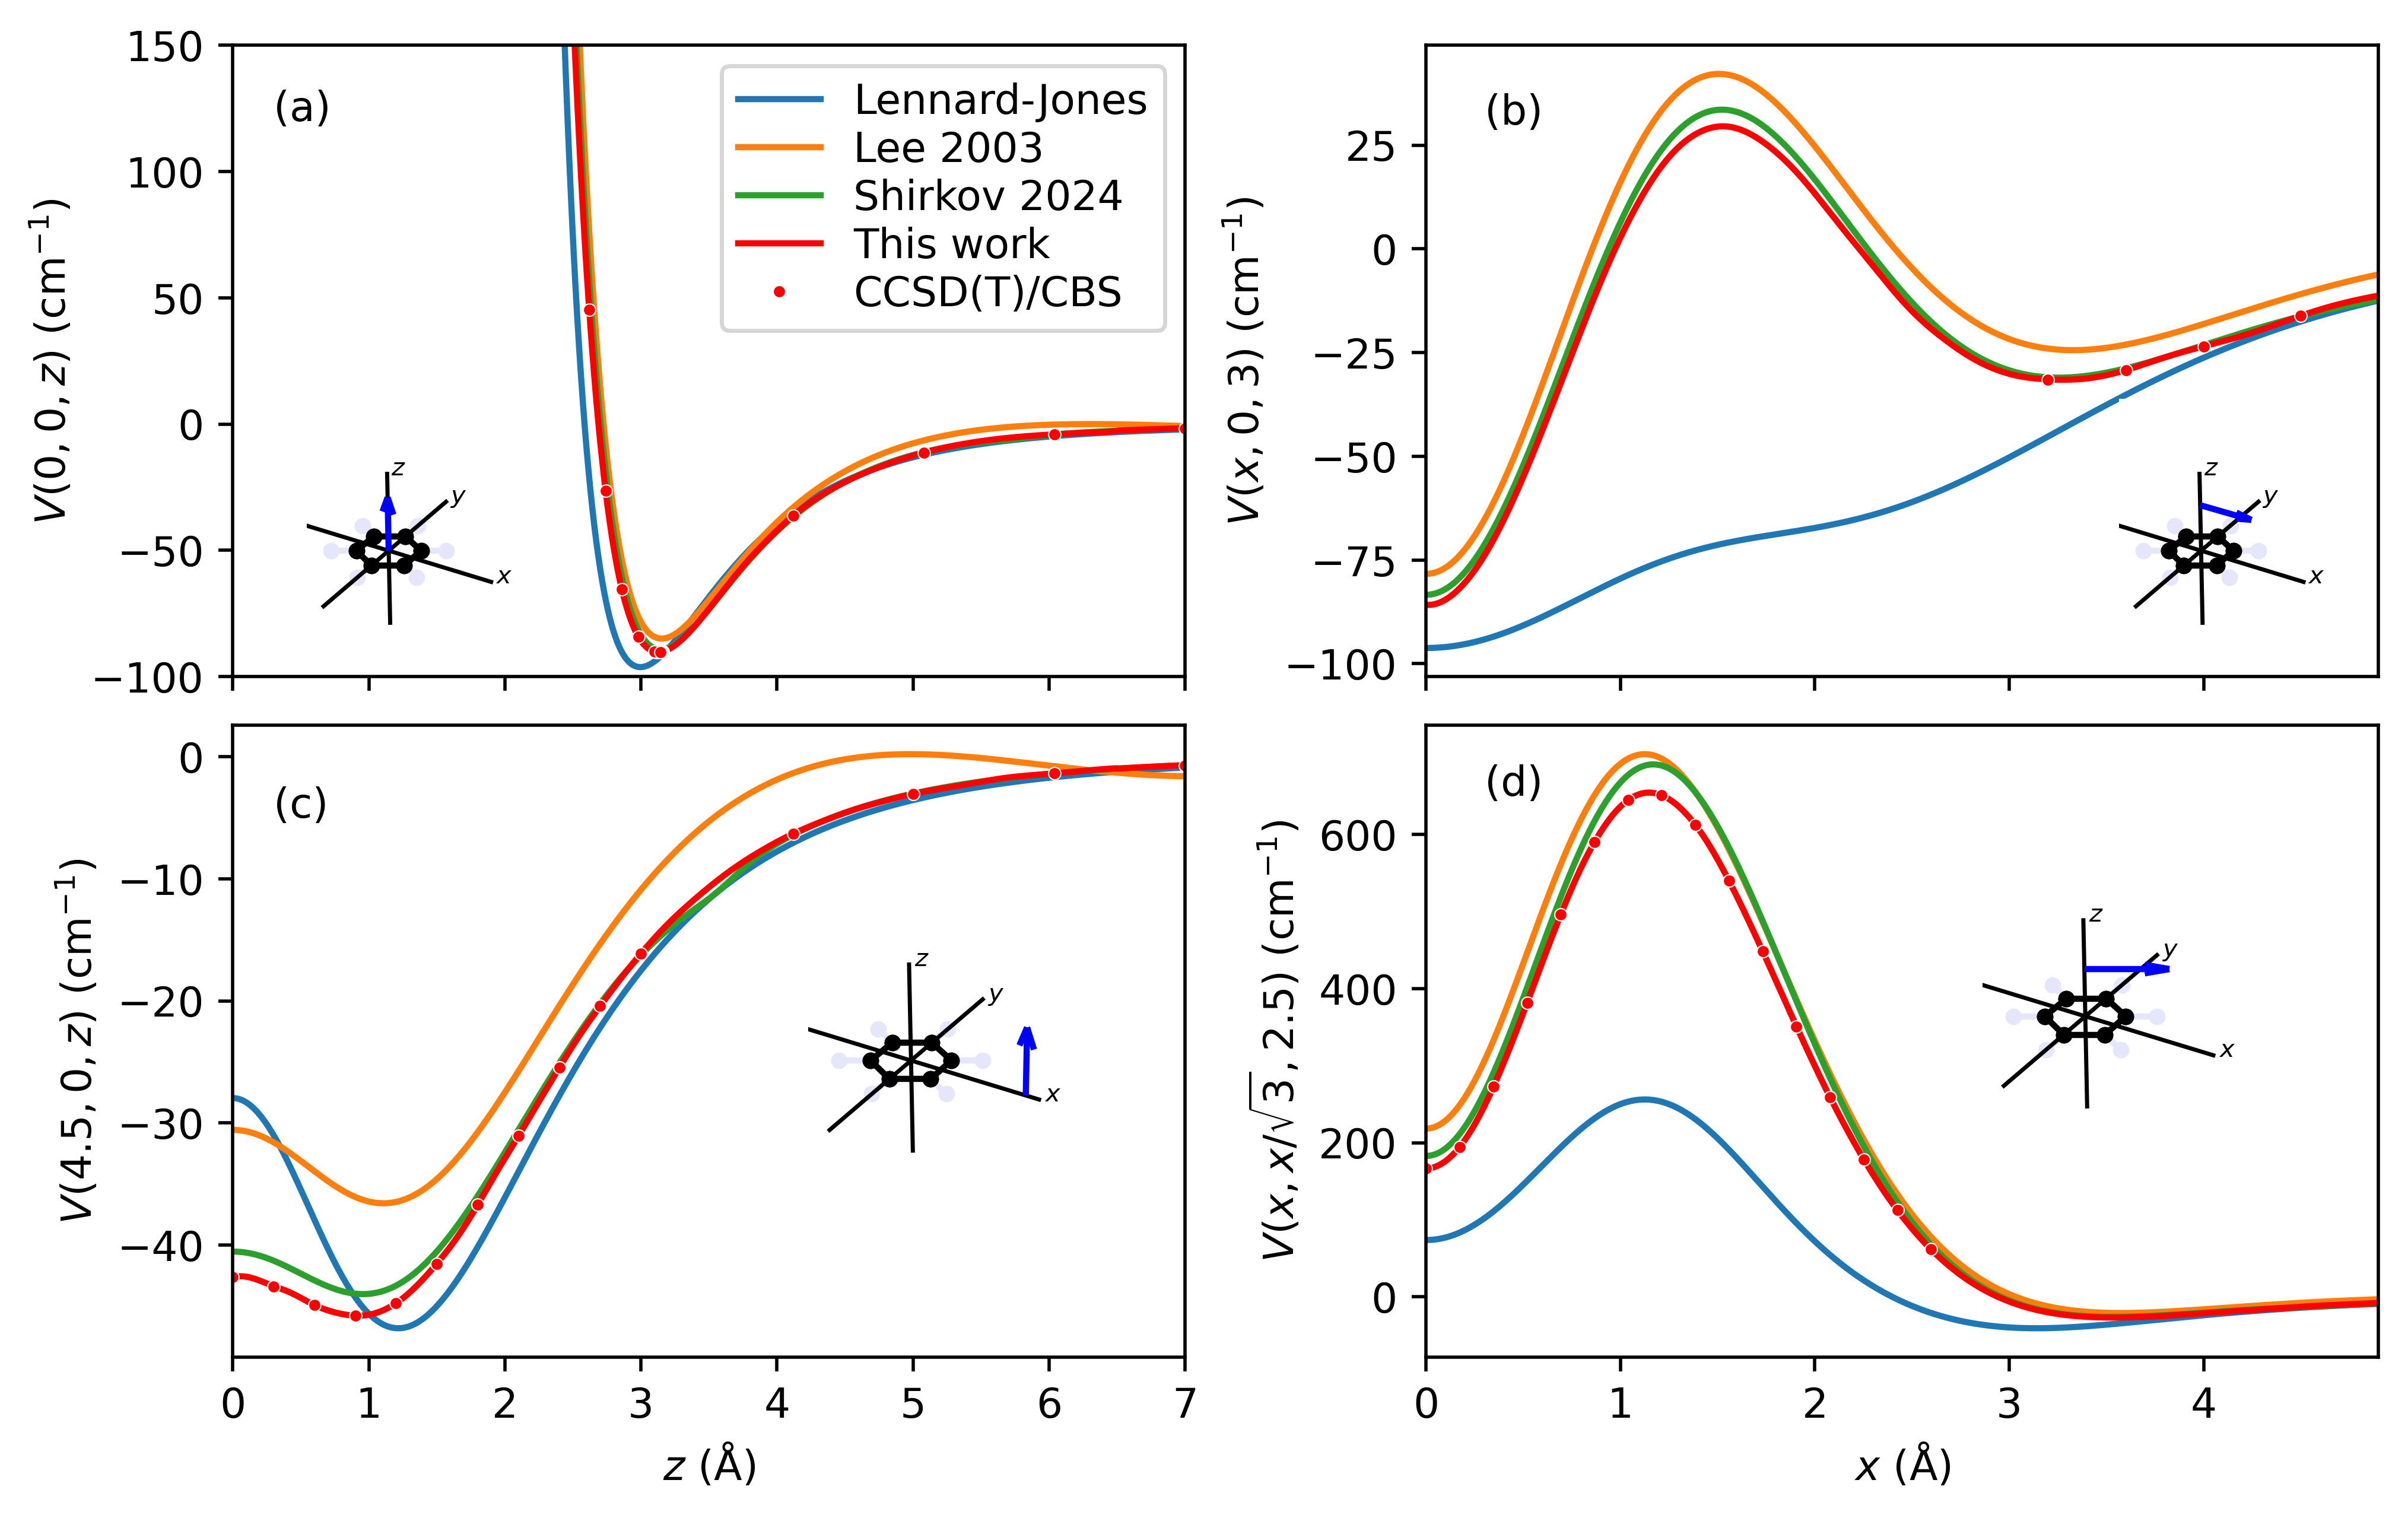

In [8]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,5), sharex='col', constrained_layout=True)
plt.gcf().set_dpi(500)
#ax1
ax1.plot(zplot,HeBz.LennardJones(0,0,zplot)*0.695,label='Lennard-Jones')
ax1.plot(zplot,HeBz.Lee2003(0,0,zplot)*0.695,label='Lee 2003')
ax1.plot(zplot,HeBz.Shirkov2024(0,0,zplot)*0.695,label='Shirkov 2024')
ax1.plot(zplot,HeBz.V(0,0,zplot)*0.695,color='red',label='This work')
ax1.plot(set1[0],set1[1],marker='o', linestyle='None',markerfacecolor='red', markeredgecolor='white', markeredgewidth=0.3,ms=3,label='CCSD(T)/CBS')
ax1.set_ylabel(r'$V(0,0,z)$ (cm$^{-1}$)')
#ax1.set_xlabel(r'z (Å)')
ax1.legend(ncol=1,loc='upper right',labelspacing=0.2)
# --- Create inset 3D axes ---
inset_ax1 = ax1.inset_axes([0.01, 0.04, 0.4, 0.4], projection='3d')
plot_benzene(inset_ax1)
val = [5,0,0]
labels = [r'$x$', r'$y$', r'$z$']
for v in range(3):
    xv = [val[v-0], -val[v-0]]
    yv = [val[v-1], -val[v-1]]
    zv = [val[v-2], -val[v-2]]
    inset_ax1.plot(xv,yv,zv,'k-', linewidth=1)
    inset_ax1.text(val[v-0]+0.2, val[v-1], val[v-2], labels[v], color='black', fontsize=6)


# Hide everything else
# make the panes transparent
#inset_ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
inset_ax1._axis3don = False
inset_ax1.quiver(0, 0, 0, 0, 0, 7, color='blue', length=0.5, arrow_length_ratio=0.3)
# Expand to remove white space
inset_ax1.set_xlim(np.array([-2,5]))
inset_ax1.set_ylim(np.array([-2,5]))
inset_ax1.set_zlim(np.array([-2,5]))
#inset_ax.set_title("Inset 3D", fontsize=9)
inset_ax1.set_xticks([])
inset_ax1.set_yticks([])
inset_ax1.set_zticks([])
ax1.set_ylim(-100,150)
ax1.set_xlim(0,7)

#ax2
ax2.plot(xplot,HeBz.LennardJones(xplot,0,3)*0.695,label='Lennard-Jones')
ax2.plot(xplot,HeBz.Lee2003(xplot,0,3)*0.695,label='Lee 2003')
ax2.plot(xplot,HeBz.Shirkov2024(xplot,0,3)*0.695,label='Shirkov 2024')
ax2.plot(xplot,HeBz.V(xplot,0,3)*0.695,color='red',label='This work')
ax2.set_ylabel(r'$V(x,0,3)$ (cm$^{-1}$)')
ax2.plot(set3[0],set3[1],marker='o', linestyle='None',markerfacecolor='red', markeredgecolor='white', markeredgewidth=0.3,ms=3,label='CCSD(T)/CBS')
#ax1.set_xlabel(r'z (Å)')
#ax2.legend()
# --- Create inset 3D axes ---
inset_ax2 = ax2.inset_axes([0.66, 0.04, 0.4, 0.4], projection='3d')
plot_benzene(inset_ax2)
val = [5,0,0]
labels = [r'$x$', r'$y$', r'$z$']
for v in range(3):
    xv = [val[v-0], -val[v-0]]
    yv = [val[v-1], -val[v-1]]
    zv = [val[v-2], -val[v-2]]
    inset_ax2.plot(xv,yv,zv,'k-', linewidth=1)
    inset_ax2.text(val[v-0]+0.2, val[v-1], val[v-2], labels[v], color='black', fontsize=6)


# Hide everything else
# make the panes transparent
#inset_ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
inset_ax2._axis3don = False
inset_ax2.quiver(0, 0, 3, 5, 0, 0, color='blue', length=0.5, arrow_length_ratio=0.3)
# Expand to remove white space
inset_ax2.set_xlim(np.array([-2,5]))
inset_ax2.set_ylim(np.array([-2,5]))
inset_ax2.set_zlim(np.array([-2,5]))
#inset_ax.set_title("Inset 3D", fontsize=9)
inset_ax2.set_xticks([])
inset_ax2.set_yticks([])
inset_ax2.set_zticks([])
#ax2.set_ylim(-170,100)
ax2.set_xlim(0,4.9)

#ax3
ax3.plot(zplot,HeBz.LennardJones(4.5,0,zplot)*0.695,label='Lennard-Jones')
ax3.plot(zplot,HeBz.Lee2003(4.5,0,zplot)*0.695,label='Lee 2003')
ax3.plot(zplot,HeBz.Shirkov2024(4.5,0,zplot)*0.695,label='Shirkov 2024')
ax3.plot(zplot,HeBz.V(4.5,0,zplot)*0.695,color='red',label='This work')
ax3.set_ylabel(r'$V(4.5,0,z)$ (cm$^{-1}$)')
ax3.set_xlabel(r'$z$ (Å)')
ax3.plot(set2[0],set2[1],marker='o', linestyle='None',markerfacecolor='red', markeredgecolor='white', markeredgewidth=0.3,ms=3,label='CCSD(T)/CBS')
#ax3.legend()
# --- Create inset 3D axes ---
inset_ax3 = ax3.inset_axes([0.52, 0.27, 0.5, 0.5], projection='3d')
plot_benzene(inset_ax3)
val = [5,0,0]
labels = [r'$x$', r'$y$', r'$z$']
for v in range(3):
    xv = [val[v-0], -val[v-0]]
    yv = [val[v-1], -val[v-1]]
    zv = [val[v-2], -val[v-2]]
    inset_ax3.plot(xv,yv,zv,'k-', linewidth=1)
    inset_ax3.text(val[v-0]+0.2, val[v-1], val[v-2], labels[v], color='black', fontsize=6)


# Hide everything else
# make the panes transparent
#inset_ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
inset_ax3._axis3don = False
inset_ax3.quiver(4.5, 0, 0, 0, 0, 7, color='blue', length=0.5, arrow_length_ratio=0.3)
# Expand to remove white space
inset_ax3.set_xlim(np.array([-2,5]))
inset_ax3.set_ylim(np.array([-2,5]))
inset_ax3.set_zlim(np.array([-2,5]))
#inset_ax.set_title("Inset 3D", fontsize=9)
inset_ax3.set_xticks([])
inset_ax3.set_yticks([])
inset_ax3.set_zticks([])
#ax3.set_ylim(-170,100)
ax3.set_xlim(0,7)

#ax4
ax4.plot(xplot,HeBz.LennardJones(xplot,xplot/np.sqrt(3),2.5)*0.695,label='Lennard-Jones')
ax4.plot(xplot,HeBz.Lee2003(xplot,xplot/np.sqrt(3),2.5)*0.695,label='Lee 2003')
ax4.plot(xplot,HeBz.Shirkov2024(xplot,xplot/np.sqrt(3),2.5)*0.695,label='Shirkov 2024')
ax4.plot(xplot,HeBz.V(xplot,xplot/np.sqrt(3),2.5)*0.695,color='red',label='This work')
ax4.plot(set4[0],set4[1],marker='o', linestyle='None',markerfacecolor='red', markeredgecolor='white', markeredgewidth=0.3,ms=3,label='CCSD(T)/CBS')
ax4.set_ylabel(r'$V(x,x/\sqrt{3},2.5)$ (cm$^{-1}$)')
ax4.set_xlabel(r'$x$ (Å)')
#ax2.legend()
# --- Create inset 3D axes ---
inset_ax4 = ax4.inset_axes([0.50, 0.34, 0.5, 0.5], projection='3d')
plot_benzene(inset_ax4)
val = [5,0,0]
labels = [r'$x$', r'$y$', r'$z$']
for v in range(3):
    xv = [val[v-0], -val[v-0]]
    yv = [val[v-1], -val[v-1]]
    zv = [val[v-2], -val[v-2]]
    inset_ax4.plot(xv,yv,zv,'k-', linewidth=1)
    inset_ax4.text(val[v-0]+0.2, val[v-1], val[v-2], labels[v], color='black', fontsize=6)


# Hide everything else
# make the panes transparent
#inset_ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#inset_ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
inset_ax4._axis3don = False
inset_ax4.quiver(0, 0, 2.5, 5, 5/np.sqrt(3), 0, color='blue', length=0.5, arrow_length_ratio=0.3)
# Expand to remove white space
inset_ax4.set_xlim(np.array([-2,5]))
inset_ax4.set_ylim(np.array([-2,5]))
inset_ax4.set_zlim(np.array([-2,5]))
#inset_ax.set_title("Inset 3D", fontsize=9)
inset_ax4.set_xticks([])
inset_ax4.set_yticks([])
inset_ax4.set_zticks([])
#ax2.set_ylim(-170,100)
ax4.set_xlim(0,4.9)
ax1.text(0.3,120,"(a)")
ax2.text(0.3,30,"(b)")
ax3.text(0.3,-5,"(c)")
ax4.text(0.3,650,"(d)")
plt.savefig('../figures/Fig2_Comp.pdf')